In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import copy

# 0. Import & clean up the datas 

## 0.1 Import the datas :

In [3]:
data_file = "45.81N-5.77E-TAVG-Trend.txt"

In [4]:
# initialize lists
year = []
month = []
anomaly = []

In [5]:
# import data from txt file
with open(data_file, 'r', encoding = 'latin1') as f:
    reader = csv.reader(f)
    for line in reader:
        lin = line[0].split()
        if len(lin) == 12 and lin[0] != "%": # skip non-data lines
            year.append(float(lin[0]))
            month.append(float(lin[1]))
            anomaly.append(float(lin[2]))

In [6]:
# convert to numpy array
year = np.array(year)
month = np.array(month)
anomaly = np.array(anomaly)

In [7]:
date = year + (month-0.5)/12.0 # convert date to decimal year
print(date)

[1743.20833333 1743.29166667 1743.375      ... 2020.79166667 2020.875
 2020.95833333]


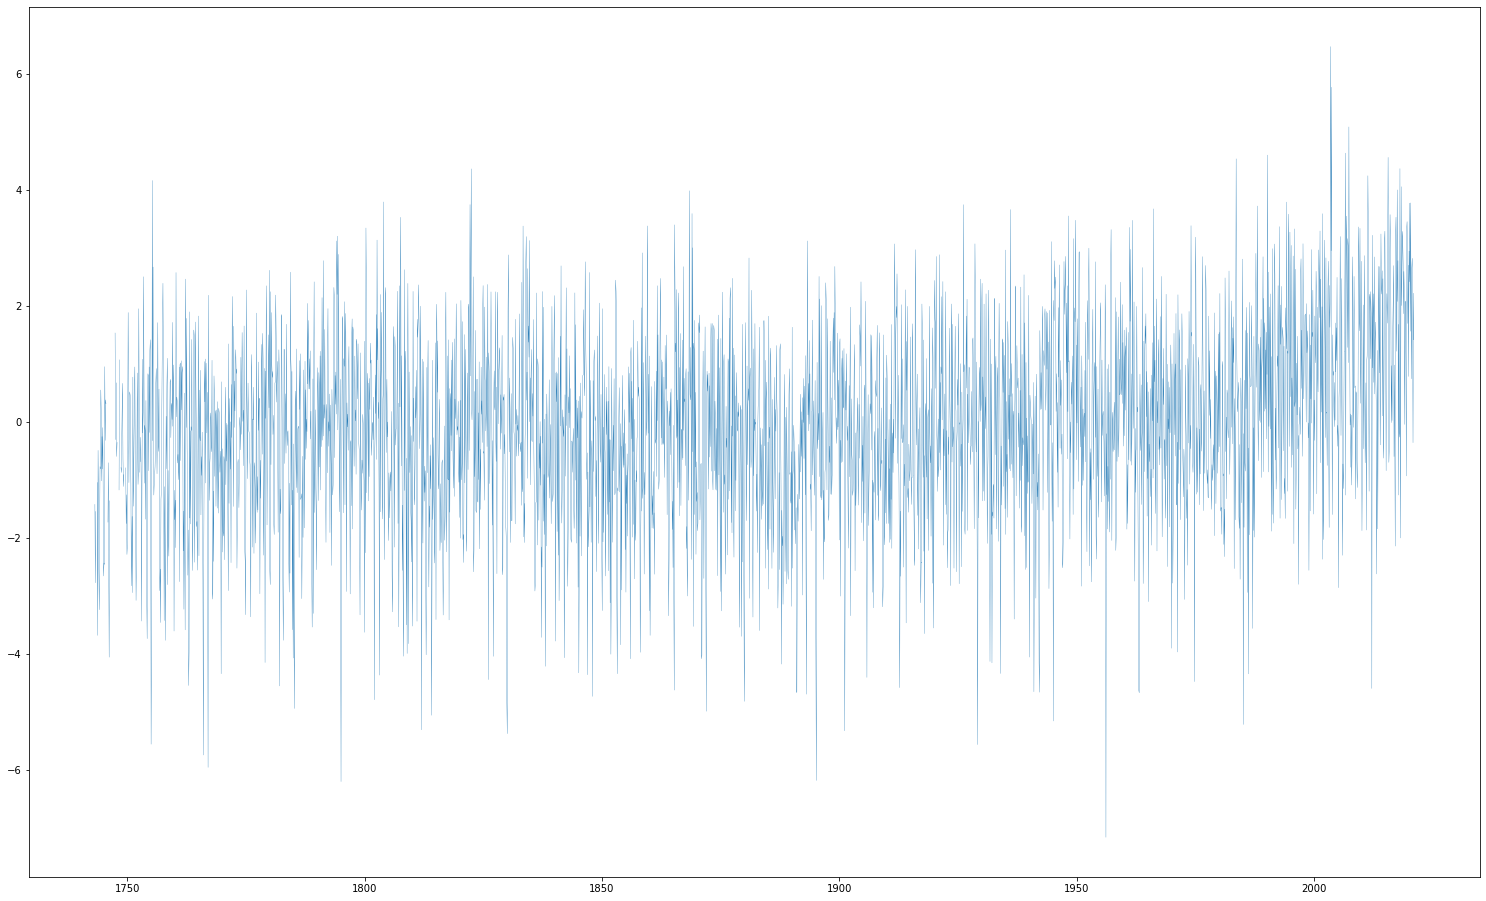

In [8]:
plt.figure(figsize=(26,16))
plt.plot(date,anomaly,linewidth=0.3)
plt.show()

## 0.2 Crop the time series for which most of the temperatures are available :

In [9]:
print (len(anomaly), len(date)) # the initial length of anomaly and date array

3334 3334


In [10]:
np.isnan(anomaly).sum() #total number of missing data in anomaly (NaN)

28

In [11]:
np.concatenate(np.argwhere(np.isnan(anomaly))) #All the indexes in the anomaly that have NaN

array([  3,   5,  29,  31,  32,  38,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  50,  53,  57,  58,  59,  60,  63,  64,  65,  74,  76,
        77, 114])

In [12]:
indexes2remove2 = np.concatenate([[3, 5], np.arange(29, 78), [114]])
indexes2remove2 #A list with all the line indexes we will remove because of the missing datas

array([  3,   5,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77, 114])

In [13]:
anomaly2 = np.delete(anomaly, indexes2remove2) #We remove the missing datas from anomaly 
date2 = np.delete(date, indexes2remove2) #We have to do the same operation the date array 
np.isnan(anomaly2).sum() # We remove all the NaN missing data in our anomaly array

0

In [14]:
print (len(anomaly2), len(date2)) # same length

3282 3282


## 0.3 Interpolation of the datas :

In [15]:
from scipy.interpolate import interp1d

In [16]:
x = np.linspace(1749.7, 2021, len(date2), endpoint=True)
y = copy.deepcopy(anomaly2)
f = interp1d(x, y, kind="cubic")

In [17]:
xnew = np.linspace(1749.7, 2021, num= int(1e+4))
ynew = f(xnew)
len(ynew)

10000

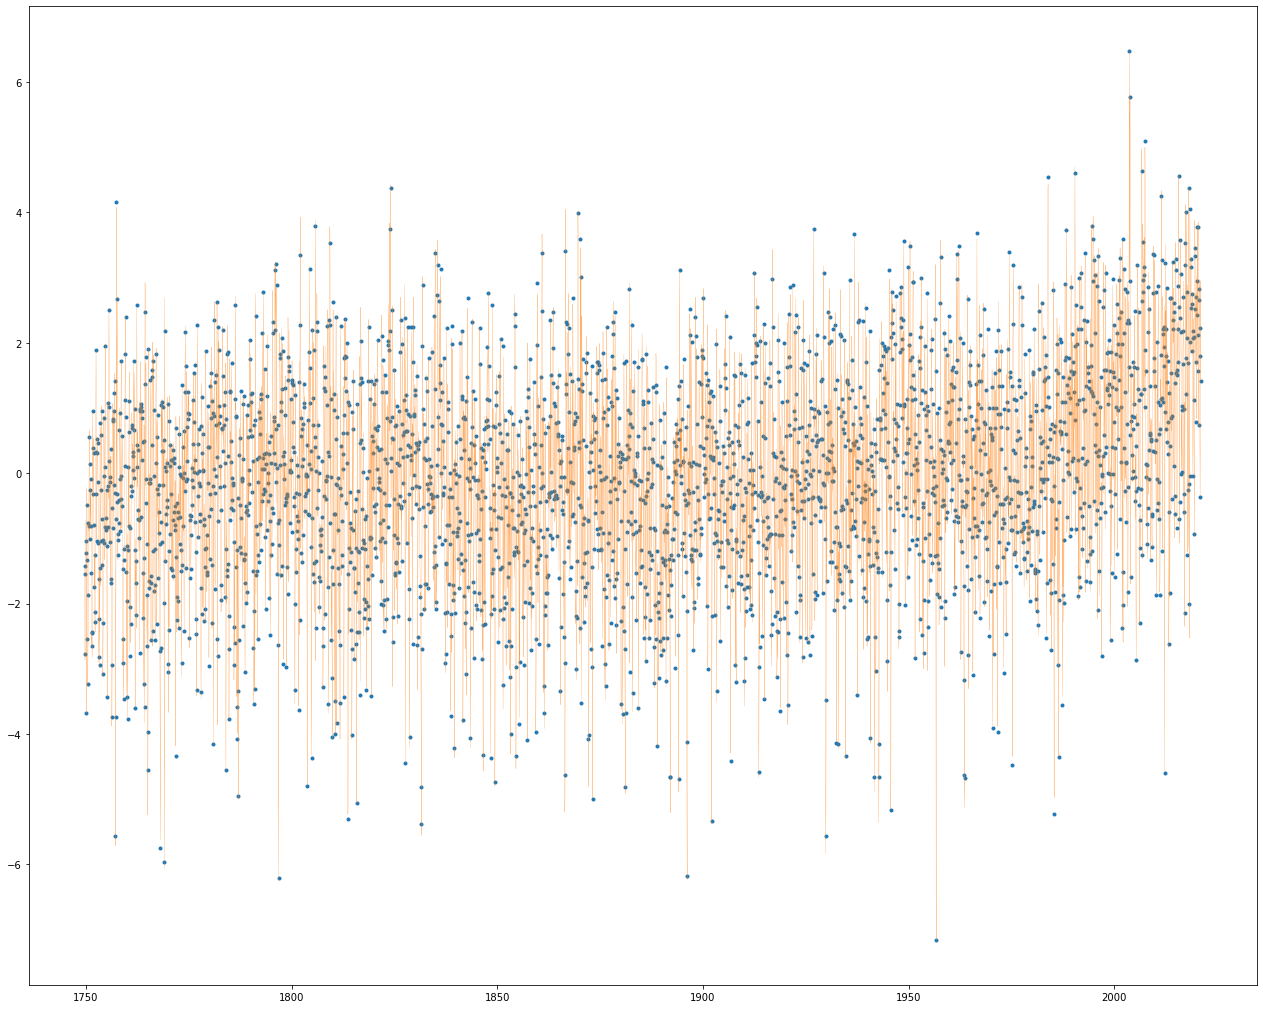

In [18]:
plt.figure(figsize=(22,18))
plt.plot(x, y, '.', xnew, ynew, '-', linewidth = 0.2)
plt.show()

# 1. Trend

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
X = xnew.reshape(len(xnew), 1)
Y = ynew.reshape(len(ynew), 1)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.90, test_size=0.1, random_state=10)

In [46]:
regr1 = LinearRegression()
regr1.fit(X_train, Y_train)

LinearRegression()

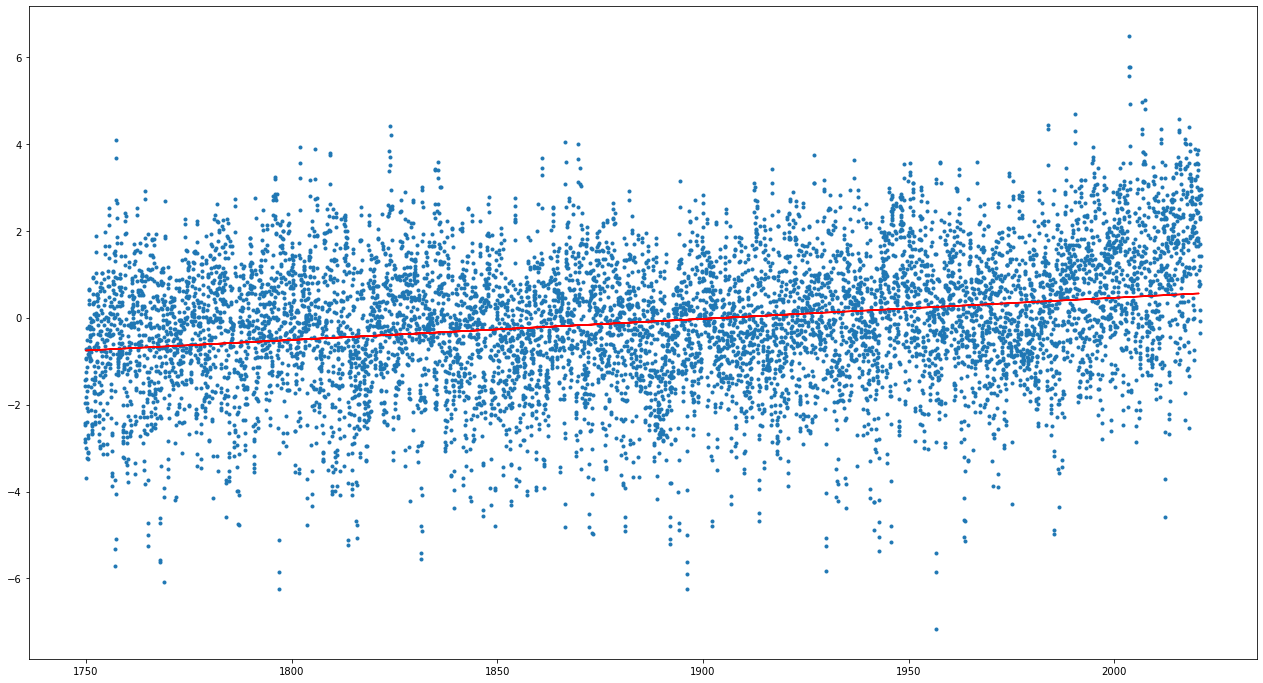

In [47]:
plt.figure(figsize=(22, 12))
plt.scatter(X_train, Y_train, marker='.')
plt.plot(X_test, regr1.predict(X_test), color = 'red')
plt.show()

In [48]:
r2_score(X_test, regr1.predict(X_test))

-564.7827083495534